In [1]:
# data analysis and wrangling
import arff
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc, roc_auc_score
from graphviz import Source
from IPython.display import SVG

In [2]:
df = pd.read_csv('/Users/admin/Documents/Documents/JLU/3rd Sem/bankloan.csv')

In [4]:
df.head(1)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [6]:
def func (train_df,test_df,response_variable,cost_of_1_predicted_0=1,cost_of_0_predicted_1=1):
    X_train_df = train_df.drop(response_variable, axis=1)
    Y_train_df = train_df[response_variable]
    X_test_df  = test_df.drop(response_variable, axis=1)
    Y_test_df = test_df[response_variable]
    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train_df, Y_train_df)
    print("The coeficients of logistic regression line are:")
    print(logreg.coef_)
    print(" ")    
    print("The intercept for logistic regression line is:")
    print(logreg.intercept_)
    print(" ")    
    Y_pred_log = logreg.predict(X_test_df)
    #roc & auc score
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test_df, Y_pred_log)
    print ("The Accuracy score for Logistic Regression Model is %2f"%(roc_auc_score(Y_test_df, Y_pred_log) * 100))
    x = false_positive_rate
    y = true_positive_rate
    # This is the ROC curve
    plt.plot(x,y)
    plt.title("ROC curve for Logistic Regression Model")
    plt.show()
    cm_lr = pd.crosstab(Y_test_df, Y_pred_log, rownames=['True'], colnames=['Predicted'], margins=True)
    print("Cost Matrix for Logistic Regression:")
    print(cm_lr)
    print(" ")
    cost_lr = cm_lr.iloc[1,0]*cost_of_1_predicted_0 + cm_lr.iloc[0,1]*cost_of_0_predicted_1
    print("The Cost for Lostic Regression Model is %2f"%cost_lr)
    print(" ")    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=100)
    decision_tree.fit(X_train_df, Y_train_df)
    Y_pred_dec = decision_tree.predict(X_test_df)
    #roc & auc score
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test_df, Y_pred_dec)
    print ("The Accuracy score for Decision Tree Model is %2f"%(roc_auc_score(Y_test_df, Y_pred_dec) * 100))
    x = false_positive_rate
    y = true_positive_rate
    # This is the ROC curve
    plt.plot(x,y)
    plt.title("ROC curve for Decision Tree Model")
    plt.show()
    cm_dt = pd.crosstab(Y_test_df, Y_pred_dec, rownames=['True'], colnames=['Predicted'], margins=True)
    print("Cost Matrix for Decision Tree:")
    print(cm_dt)
    print(" ")    
    cost_dt = cm_dt.iloc[1,0]*cost_of_1_predicted_0 + cm_dt.iloc[0,1]*cost_of_0_predicted_1
    print("The Cost for Decision Tree Model is %2f"%cost_dt)
    print(" ")       
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
    random_forest.fit(X_train_df, Y_train_df)
    Y_pred_ran = random_forest.predict(X_test_df)
    #roc & auc score
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test_df, Y_pred_ran)
    print ("The Accuracy score for Random Forest Model is %2f"%(roc_auc_score(Y_test_df, Y_pred_ran) * 100))
    x = false_positive_rate
    y = true_positive_rate
    # This is the ROC curve
    plt.plot(x,y)
    plt.title("ROC curve for Random Forest Model")
    plt.show()
    print(" ")
    cm_rf = pd.crosstab(Y_test_df, Y_pred_ran, rownames=['True'], colnames=['Predicted'], margins=True)
    print("Cost Matrix for Random Forest:")
    print(cm_rf)
    print(" ")
    cost_rf = cm_rf.iloc[1,0]*cost_of_1_predicted_0 + cm_rf.iloc[0,1]*cost_of_0_predicted_1
    print("The Cost for Random Forest Model is %2f"%cost_rf)
    print(" ")
    models = pd.DataFrame({'Models':['Logistic Regression', 'Decision Tree', 
              'Random Forest']})
    models['Cost'] = [cost_lr, cost_dt, cost_rf]
    print("The cost for various models is as follows:")
    print(models)
    print(" ")
    importances_dt = decision_tree.feature_importances_
    df_dt_imp = pd.DataFrame(X_train_df.columns)
    df_dt_imp['importance'] = importances_dt
    df_dt_imp.columns = ['variables','importance']
    df_dt_imp.sort_values(by='importance',ascending=False,inplace=True)
    print(df_dt_imp.plot(kind="bar",x=df_dt_imp['variables'],title="Importance Plot for Decision Tree"))
    print(" ")
    importances_rf = random_forest.feature_importances_
    df_rf_imp = pd.DataFrame(X_train_df.columns)
    df_rf_imp['importance'] = importances_rf
    df_rf_imp.columns = ['variables','importance']
    df_rf_imp.sort_values(by='importance',ascending=False,inplace=True)
    print(df_rf_imp.plot(kind="bar",x=df_rf_imp['variables'],title="Importance Plot for Random Forest"))
    

The coeficients of logistic regression line are:
[[ 0.02459976  0.14807761 -0.25387793 -0.10595275 -0.00974662  0.05874068
   0.59375803  0.06772009]]
 
The intercept for logistic regression line is:
[-1.14648741]
 
The Accuracy score for Logistic Regression Model is 68.215448


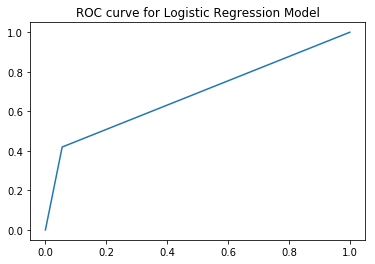

Cost Matrix for Logistic Regression:
Predicted    0   1  All
True                   
0          103   6  109
1           18  13   31
All        121  19  140
 
The Cost for Lostic Regression Model is 24.000000
 
The Accuracy score for Decision Tree Model is 62.710861


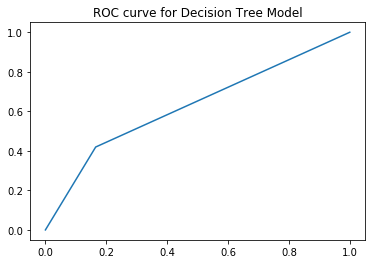

Cost Matrix for Decision Tree:
Predicted    0   1  All
True                   
0           91  18  109
1           18  13   31
All        109  31  140
 
The Cost for Decision Tree Model is 36.000000
 
The Accuracy score for Random Forest Model is 67.519976


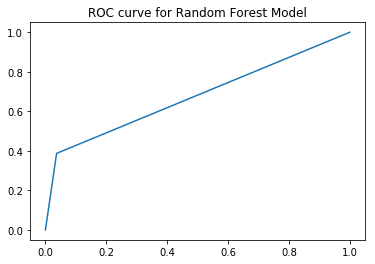

 
Cost Matrix for Random Forest:
Predicted    0   1  All
True                   
0          105   4  109
1           19  12   31
All        124  16  140
 
The Cost for Random Forest Model is 23.000000
 
The cost for various models is as follows:
                Models  Cost
0  Logistic Regression    24
1        Decision Tree    36
2        Random Forest    23
 
Axes(0.125,0.125;0.775x0.755)
 
Axes(0.125,0.125;0.775x0.755)


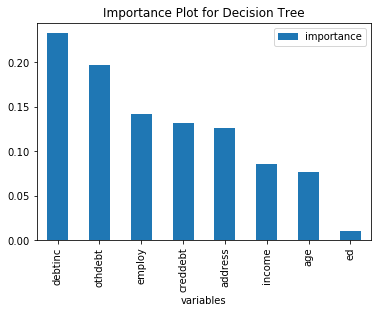

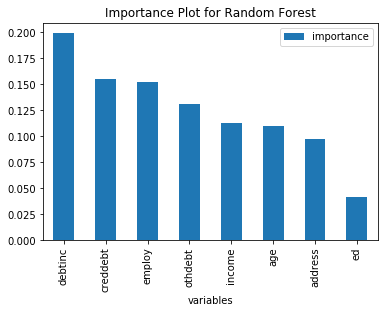

In [7]:
func(train_df,test_df,"default")